<a href="https://colab.research.google.com/github/Sriva29/object-detection/blob/main/obj_detection_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This ipynb shows the use of two pre-trained models for object detection
by Srivatsan Rangarajan

In [23]:
!pip install keras-cv torch torchvision ultralytics matplotlib



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 55.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 33.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 29.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 74.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.3/949.3 kB 42.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [2]:
import torch
from torchvision import models, transforms
from PIL import Image
import matplotlib.pyplot as plt
import requests
from io import BytesIO

In [3]:
image_url = "https://github.com/Sriva29/object-detection/blob/main/street.jpeg?raw=true"
response = requests.get(image_url)
img = Image.open(BytesIO(response.content)).convert("RGB")

# Define a transform to convert the image to a tensor
transform = transforms.Compose([
    transforms.ToTensor(),
])
img_tensor = transform(img)

### Pretrained Model 1 - Faster R-CNN

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


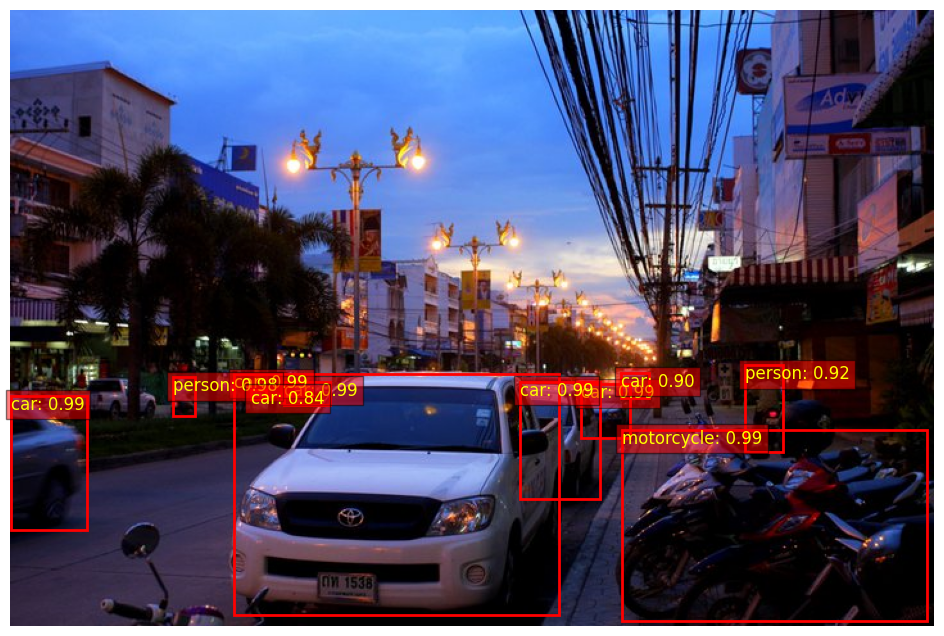

In [4]:
# ----- Faster R-CNN from torchvision -----
# Load a pre-trained Faster R-CNN model (pretrained on COCO)
faster_rcnn = models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
faster_rcnn.eval()  # Set to evaluation mode

# Run inference (Torchvision detection models expect a list of images)
with torch.no_grad():
    predictions = faster_rcnn([img_tensor])

# COCO class names (from torchvision)
COCO_INSTANCE_CATEGORY_NAMES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
    'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A',
    'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse',
    'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack',
    'umbrella', 'N/A', 'N/A', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis',
    'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove',
    'skateboard', 'surfboard', 'tennis racket', 'bottle', 'N/A', 'wine glass',
    'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich',
    'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair',
    'couch', 'potted plant', 'bed', 'N/A', 'dining table', 'N/A', 'N/A', 'toilet',
    'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book', 'clock',
    'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

def plot_faster_rcnn(img, prediction, threshold=0.8):
    plt.figure(figsize=(12, 8))
    plt.imshow(img)
    ax = plt.gca()
    boxes = prediction[0]['boxes'].cpu().numpy()
    scores = prediction[0]['scores'].cpu().numpy()
    labels = prediction[0]['labels'].cpu().numpy()
    for box, score, label in zip(boxes, scores, labels):
        if score < threshold:
            continue
        xmin, ymin, xmax, ymax = box
        rect = plt.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin,
                             fill=False, color='red', linewidth=2)
        ax.add_patch(rect)
        ax.text(xmin, ymin,
                f"{COCO_INSTANCE_CATEGORY_NAMES[label]}: {score:.2f}",
                fontsize=12, color='yellow', verticalalignment='top',
                bbox=dict(facecolor='red', alpha=0.5))
    plt.axis('off')
    plt.show()

# Visualize Faster R-CNN predictions
plot_faster_rcnn(img, predictions, threshold=0.8)



### Pretrained model 2 - YOLO


0: 448x640 1 person, 1 bicycle, 9 cars, 2 motorcycles, 1 traffic light, 324.4ms
Speed: 19.9ms preprocess, 324.4ms inference, 9.3ms postprocess per image at shape (1, 3, 448, 640)

0: 448x640 1 person, 1 bicycle, 9 cars, 2 motorcycles, 1 traffic light, 409.8ms
Speed: 10.6ms preprocess, 409.8ms inference, 1.4ms postprocess per image at shape (1, 3, 448, 640)


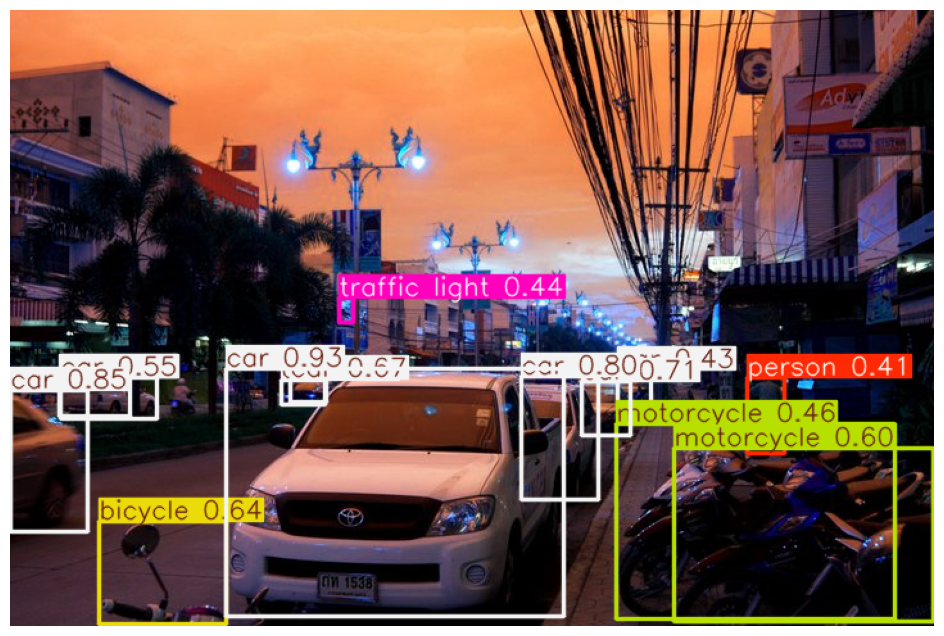

In [9]:
# ----- YOLOv8 from Ultralytics -----
from ultralytics import YOLO

# Load the YOLOv8 model (using the nano version; change to "yolov8s.pt", "yolov8m.pt", etc., if desired)
yolo_model = YOLO("yolov8n.pt")  # This downloads the weights if not present

# Run inference on the same image
results = yolo_model(img)  # YOLOv8 can take a PIL image directly

# Run inference
results = yolo_model(img)

# Get the annotated image from .plot()
annotated_image = results[0].plot()

# Visualize the annotated image
plt.figure(figsize=(12, 8))
plt.imshow(annotated_image)
plt.axis('off')
plt.show()
